In [2]:
import numpy as np
import keras.models as Sequential  # Consider renaming this import to avoid confusion with the 'Sequential' class
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D  # Import layers directly
from keras.utils import to_categorical
from keras.datasets import cifar10  # Note the correction to 'datasets'
from keras.optimizers import Adam  # Note the correction to 'optimizers'
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [3]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


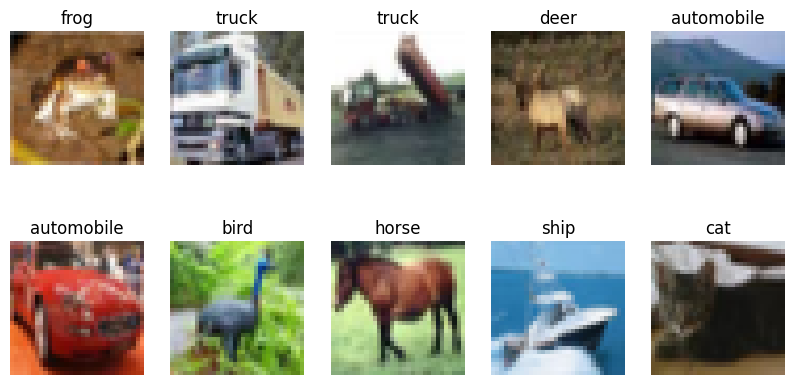

In [4]:
import matplotlib.pyplot as plt

class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
fig, axis = plt.subplots(2, 5, figsize=(10, 5))  # Create subplots

for i, ax in enumerate(axis.flat):  # Iterate over subplots using 'axis'
    image, label = x_train[i], y_train[i]
    ax.imshow(image, cmap="gray")
    ax.set_title(f"{class_labels[label.item()]}")
    ax.axis("off")
plt.show()

**normalize the pixels values to be betyween 0 and 1**

In [5]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255


**convert clas vectoe to the binary class metrices/ one hot encoding**

In [6]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [7]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [8]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()  # Now this should work correctly


In [9]:
#model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), padding='same',
                 activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,906 (1.99 MB)

 Trainable params: 520,906 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
model.fit(x_train,y_train,epochs=30,batch_size=64,verbose=1,
          validation_data=(x_test,y_test))

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.2871 - loss: 1.8974 - val_accuracy: 0.5439 - val_loss: 1.2484
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5534 - loss: 1.2527 - val_accuracy: 0.6382 - val_loss: 1.0194
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6471 - loss: 1.0166 - val_accuracy: 0.6880 - val_loss: 0.8847
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7076 - loss: 0.8526 - val_accuracy: 0.7051 - val_loss: 0.8556
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7422 - loss: 0.7520 - val_accuracy: 0.7211 - val_loss: 0.8247
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7783 - loss: 0.6434 - val_accuracy: 0.7265 - val_loss: 0.8055
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8057 - loss: 0.5619 - val_accuracy: 0.7341 - val_loss: 0.8061
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8319 - loss: 0.4917 - val_accuracy: 

In [12]:
#EVALUATE
loss,accuracy=model.evaluate(x_test,y_test)
print("Test accuracy:",accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7294 - loss: 1.7595
Test accuracy: 0.7260000109672546


In [13]:
pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

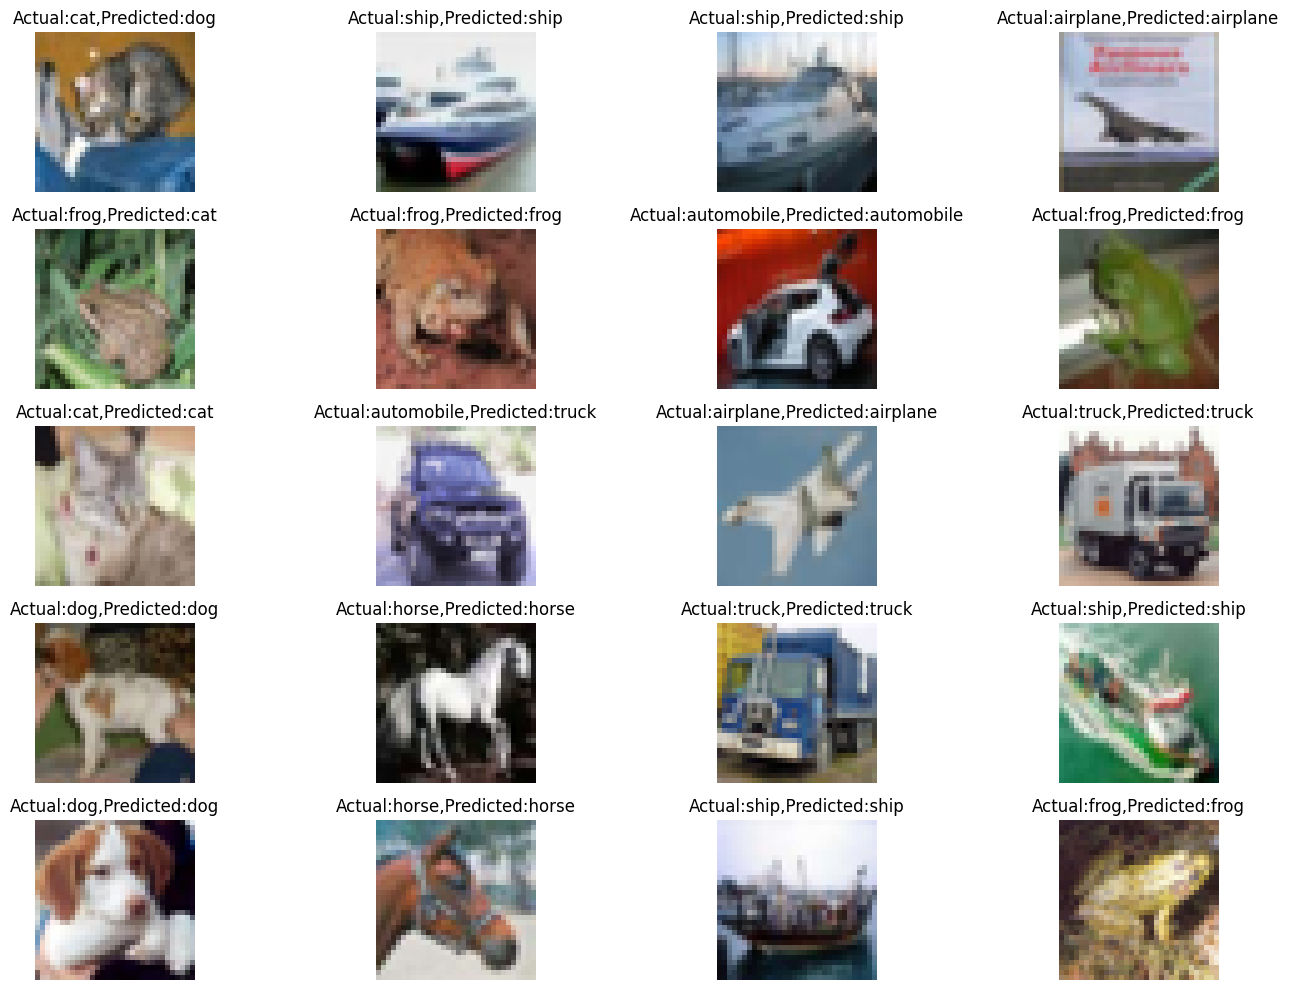

In [14]:
num_images_to_display=20
num_columns=4
num_rows=(num_images_to_display+num_columns-1)//num_columns

fig,axes=plt.subplots(num_rows,num_columns,figsize=(15,10))
for i, ax in enumerate(axes.flat):
  if i<num_images_to_display:
    ax.imshow(x_test[i])
    actual_label=class_labels[np.argmax(y_test[i])]
    predicted_labels=class_labels[np.argmax(pred[i])]
    ax.set_title(f"Actual:{actual_label},Predicted:{predicted_labels}") # Use predicted_labels here
    ax.axis("off")
  else:
    ax.axis("off")
plt.tight_layout()
plt.show

**Save and Download the Model**

In [18]:
# Assuming you have a trained CNN model called 'model'
from tensorflow.keras.models import save_model

# Save the model in the recommended Keras format
model.save('cnn.keras')  # Changed the extension to .keras

In [20]:
from tensorflow.keras.models import save_model
import google.colab

# Save the model in the recommended Keras format
model.save('cnn.keras')

# Download the saved model to your laptop
google.colab.files.download('cnn.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>